Temat 7
# Rozwiązywanie problemu 3SAT

Dana jest formuła logiczna w koniunkcyjnej postaci normalnej o maksymalnie 3 literałach w
każdej klauzuli (postać 3CNF), np.
$𝜑 = (𝑥1 ∨ 𝑥2 ∨ 𝑥3) ∧ (¬𝑥1 ∨ 𝑥2 ∨ 𝑥4)\\
∧ (𝑥2 ∨ ¬𝑥3 ∨ ¬𝑥4) ∧ (¬𝑥1 ∨ ¬𝑥2 ∨ 𝑥5)\\
∧ (𝑥1 ∨ ¬𝑥3 ∨ 𝑥5) ∧ (¬𝑥3 ∨ 𝑥4 ∨ ¬𝑥5)\\
∧ (𝑥1 ∨ ¬𝑥2 ∨ ¬𝑥5) ∧ (¬𝑥1 ∨ ¬𝑥4 ∨ ¬𝑥5)\\
∧ (¬𝑥2 ∨ ¬𝑥3 ∨ ¬𝑥5) ∧ (¬𝑥1 ∨ ¬𝑥2 ∨ ¬𝑥4)$

Formuła $𝜑$ ma 10 klauzul (nawiasów), w każdym po trzy literały (zmienne), z negacją lub bez.
Pomiędzy klauzulami są znaki koniunkcji, tzn. żeby $𝜑 ≡ 𝑇𝑟𝑢𝑒$, wszystkie nawiasy muszą być
spełnione. W środku każdej klauzuli są znaki alternatywy tzn. żeby nawias dał $𝑇𝑟𝑢𝑒$,
przynajmniej jedna zmienna w nim musi dać 1.

Problem 3SAT (3-Satisfiability, 3-Spełnialność) zadaje pytanie: czy istnieje takie podstawienie
zmiennych, żeby $𝜑 ≡ 𝑇𝑟𝑢𝑒$ ?

Jeśli weźmiemy $𝜑$ z przykładu to widać, że podstawienie $𝑥_1 = 1$, $𝑥_2 = 1$, $𝑥_3 = 0$, $𝑥_4 = 0$, $𝑥_5 = 1$
spowoduje, że wszystkie nawiasy dadzą $𝑇𝑟𝑢𝑒$ więc również cała formuła $≡ 𝑇𝑟𝑢𝑒$. Dla
powyższej formuły logicznej odpowiedź brzmi „TAK”. Istnieją oczywiście formuły niespełnialne,
dla których nie istnieje podstawienie spełniające.

Twoim zadaniem jest wykorzystanie algorytmu genetycznego, PSO i być może dodatkowego
algorytmu np. DPLL, do próby rozwiązania 3SAT. Odpowiedz na pytania: czy te algorytmy
rozwiązują 3SAT i czy robią to szybko. Zrób sensowne porównania (tabelaryczne, wykresowe).

Rozważ wiele różnych formuł, w tym również skomplikowanych np. 400 klauzul, 100
zmiennych. 
Można je pobrać z Internetu np. tutaj:

*   https://people.sc.fsu.edu/~jburkardt/data/cnf/cnf.html
*   https://www.cs.ubc.ca/~hoos/SATLIB/benchm.html


Import pakietów

In [4]:
pip install pyeasyga

In [5]:
pip install pycosat

In [6]:
from os import path
from pyeasyga import pyeasyga
import time
import pycosat

Zdefiniowanie funkcji otwierającej pliki z rozszerzeniem cnf

In [7]:
def load_cnf(a):
    data = []
    with open(a, 'r') as f:
        for line in f.readlines():
            if line[0] in ['c', 'p']:
                continue
            splitted_line = ' '.join(line.split()).split(' ')
            int_line = []
            for element in splitted_line:
                if element == '0': continue
                int_line.append(int(element))
            data.append(int_line)
        return data

Zaczniemy od przypadku z 403 klauzulami i 100 zmiennymi.

In [8]:
cnf = load_cnf('/content/CBS_k3_n100_m403_b10_0.cnf')

Zdefiniowanie funkcji konwertującej format cnf na boolean

In [9]:
def conv_cnf_to_py(cnf, candidates):
    clauses = []
    for clause in cnf:
        temp = [None] * 3
        i = 0
        for rule in clause:
            if rule > len(candidates):
                raise Exception(f'Individual CNF value: {rule} references to undefined value.')
            if rule < 0:
                temp[i] = not bool(candidates[-1 * rule - 1])
            else:
                temp[i] = bool(candidates[rule - 1])
            i += 1
        clauses.append(temp[0] or temp[1] or temp[2])
    return sum([1 for res in clauses if res])

Definiowanie funkcji fitness

In [10]:
def fitness(member, data):
    return conv_cnf_to_py(cnf, member)

Algorytm genetyczny

In [11]:
ga = pyeasyga.GeneticAlgorithm(
    list(range(0, 100)),
    mutation_probability=0.2,
    population_size=200,
    generations=500,
    crossover_probability=0.8,
    elitism=True
)

In [12]:
ga.fitness_function = fitness
start = time.time()
ga.run()
end = time.time()
czas = end - start
print("Czas wykonywania algorytmu genetycznego dla skompliowanego przypadku : {czas}".format(czas = czas))

Czas wykonywania algorytmu genetycznego dla skompliowanego przypadku : 66.62794280052185


Wyniki:

In [13]:
print(ga.best_individual())

(396, [0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0])


Następną próbę wykorzystamy z przypadku z 418 klauzulami i 100 zmiennymi.

In [16]:
cnf = load_cnf('/content/CBS_k3_n100_m418_b10_0.cnf')

Algorytm genetyczny

In [17]:
ga.fitness_function = fitness
start = time.time()
ga.run()
end = time.time()
czas = end - start
print("Czas wykonywania algorytmu genetycznego dla skompliowanego przypadku : {czas}".format(czas = czas))

Czas wykonywania algorytmu genetycznego dla skompliowanego przypadku : 68.4097044467926


Wynik

In [18]:
print(ga.best_individual())

(415, [1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])


Następną próbę wykorzystamy z przypadku z 435 klauzulami i 100 zmiennymi.

In [21]:
cnf = load_cnf('/content/CBS_k3_n100_m435_b10_0.cnf')

Algorytm genetyczny

In [22]:
ga.fitness_function = fitness
start = time.time()
ga.run()
end = time.time()
czas = end - start
print("Czas wykonywania algorytmu genetycznego dla skompliowanego przypadku : {czas}".format(czas = czas))

Czas wykonywania algorytmu genetycznego dla skompliowanego przypadku : 80.87119245529175


Wynik

In [23]:
print(ga.best_individual())

(433, [0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1])


Średnie czasy wykonywania algorytmów na 10 prób:

Z racji na absurdalne wyniki algorytmu DPLL zdecydowałam się go nie pokazywać.

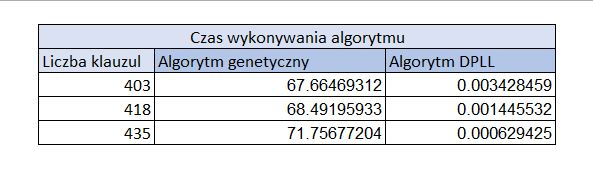